In [ ]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/auxiliaries'
from preamble import *

Mounted at /content/gdrive
/content/gdrive/My Drive/Econ 484/auxiliaries


#### Ensembles of Decision Trees
##### Random forests
###### Building random forests
###### Analyzing random forests

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #radnomforrestregressor if you want it to go on forever
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

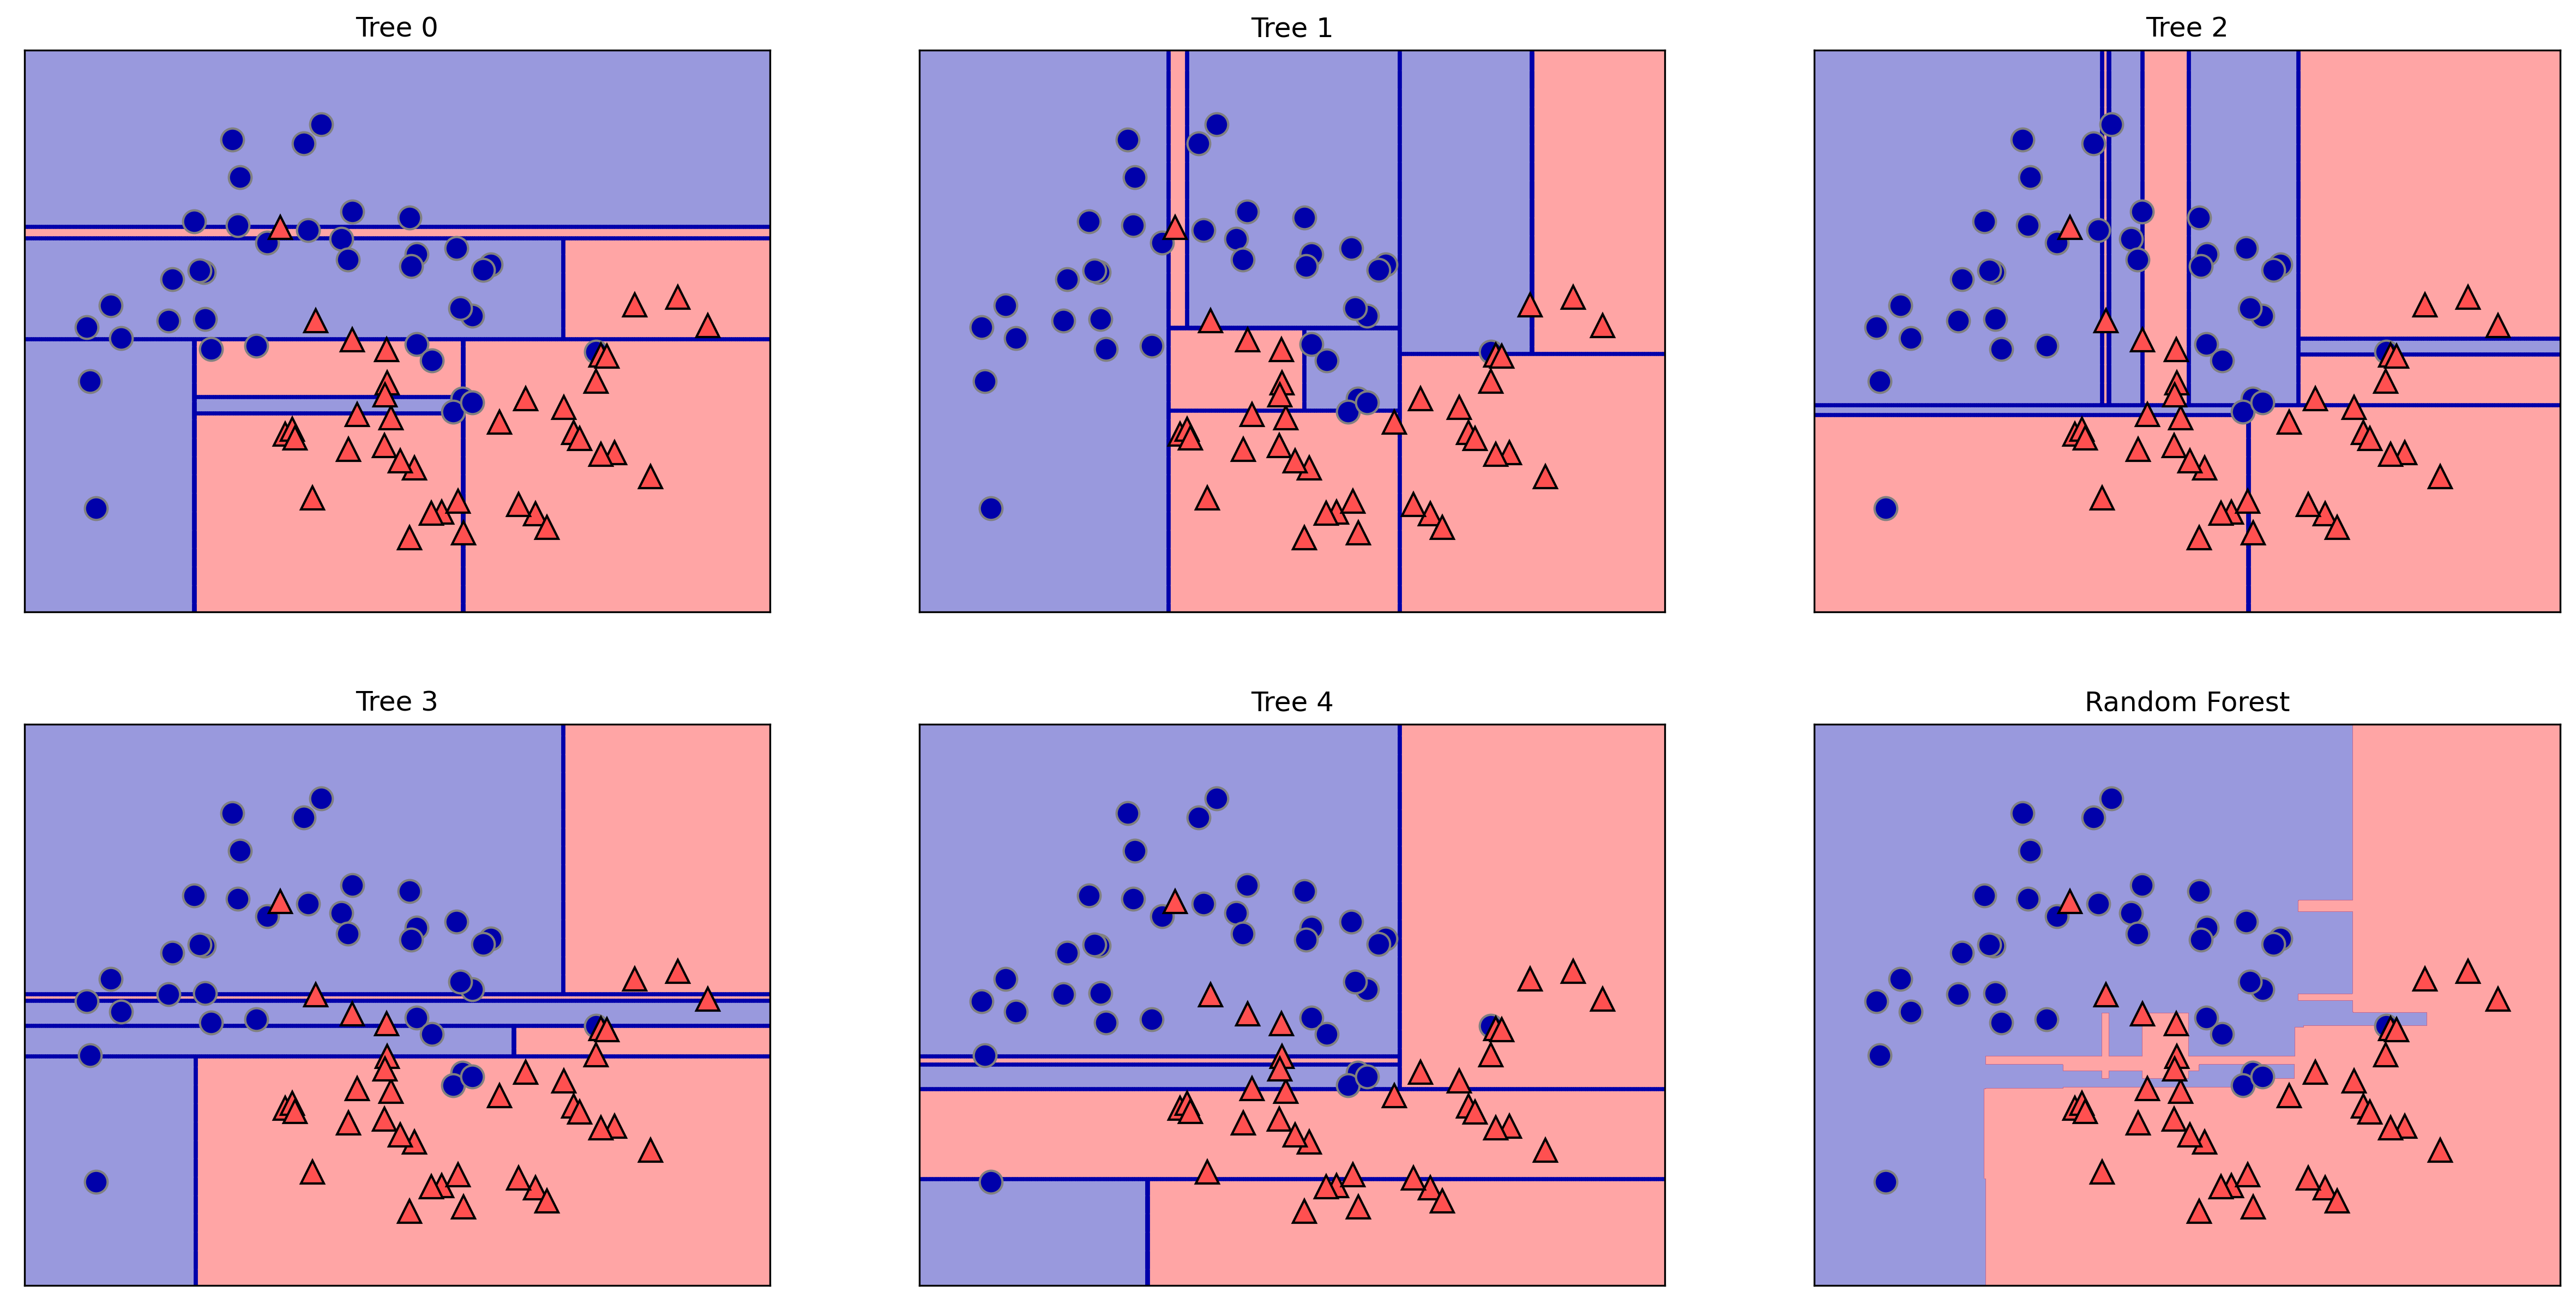

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))



Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [ ]:
yhat_test = forest.predict(X_test)
fp=sum(yhat_test*(1-y_test)) #a way to count the false positives
fn = sum((1-yhat_test)*y_test)
print("Number of false positives: {:.0f}".format(fp))
print("Number of false negatives: {:.0f}".format(fn))
y_test.shape


Number of false positives: 1
Number of false negatives: 3


(143,)

In [ ]:
yhat_test = forest.predict_proba(X_test)[:,1]>=.25
fp=sum(yhat_test*(1-y_test))
fn = sum((1-yhat_test)*y_test)
print("Number of false positives: {:.0f}".format(fp))
print("Number of false negatives: {:.0f}".format(fn))
y_test.shape

Number of false positives: 6
Number of false negatives: 0


(143,)

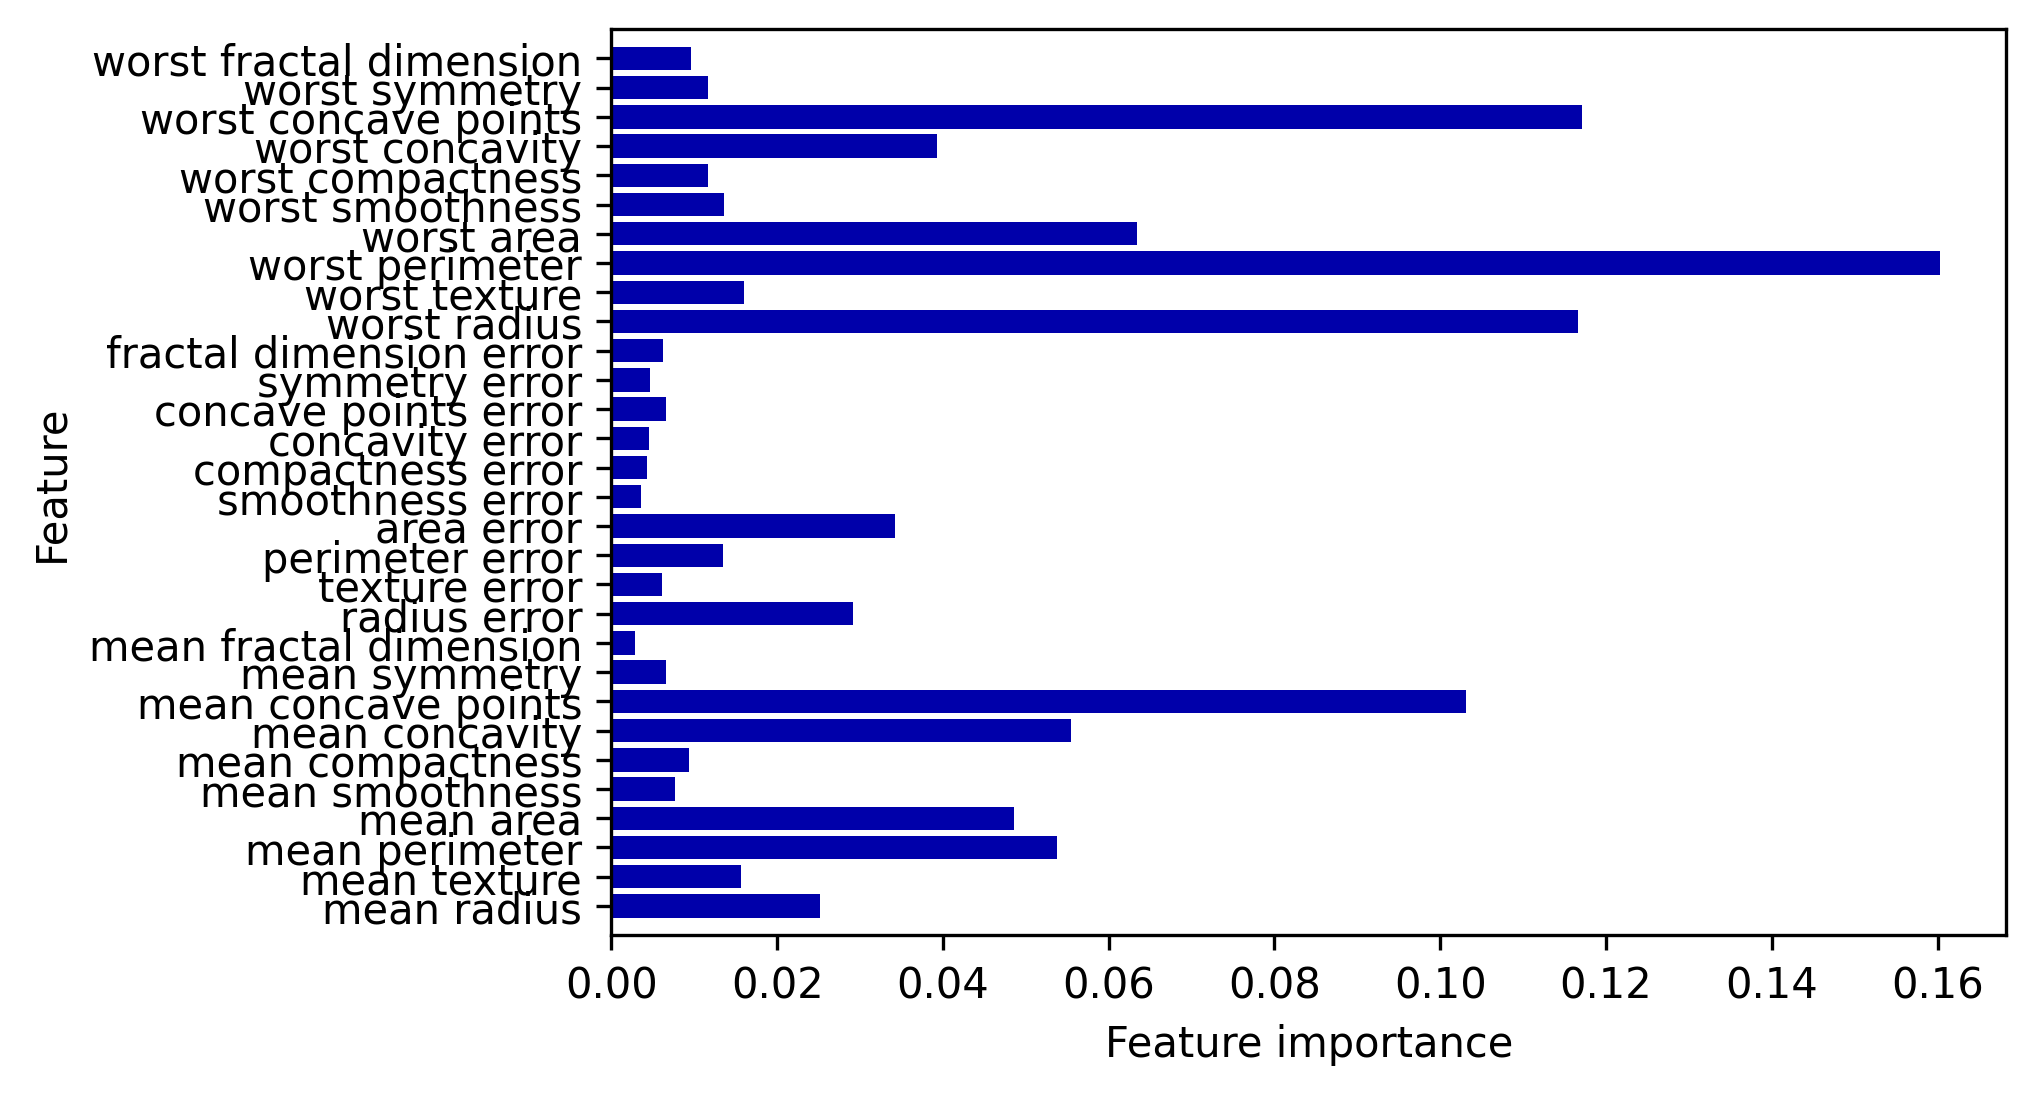

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances_cancer(forest)

###### Strengths, weaknesses, and parameters

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) #tuning parameter is max depth
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01) #the other tuning parameter is learning rate or lamda
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Accuracy on training set: 0.991
Accuracy on test set: 0.972


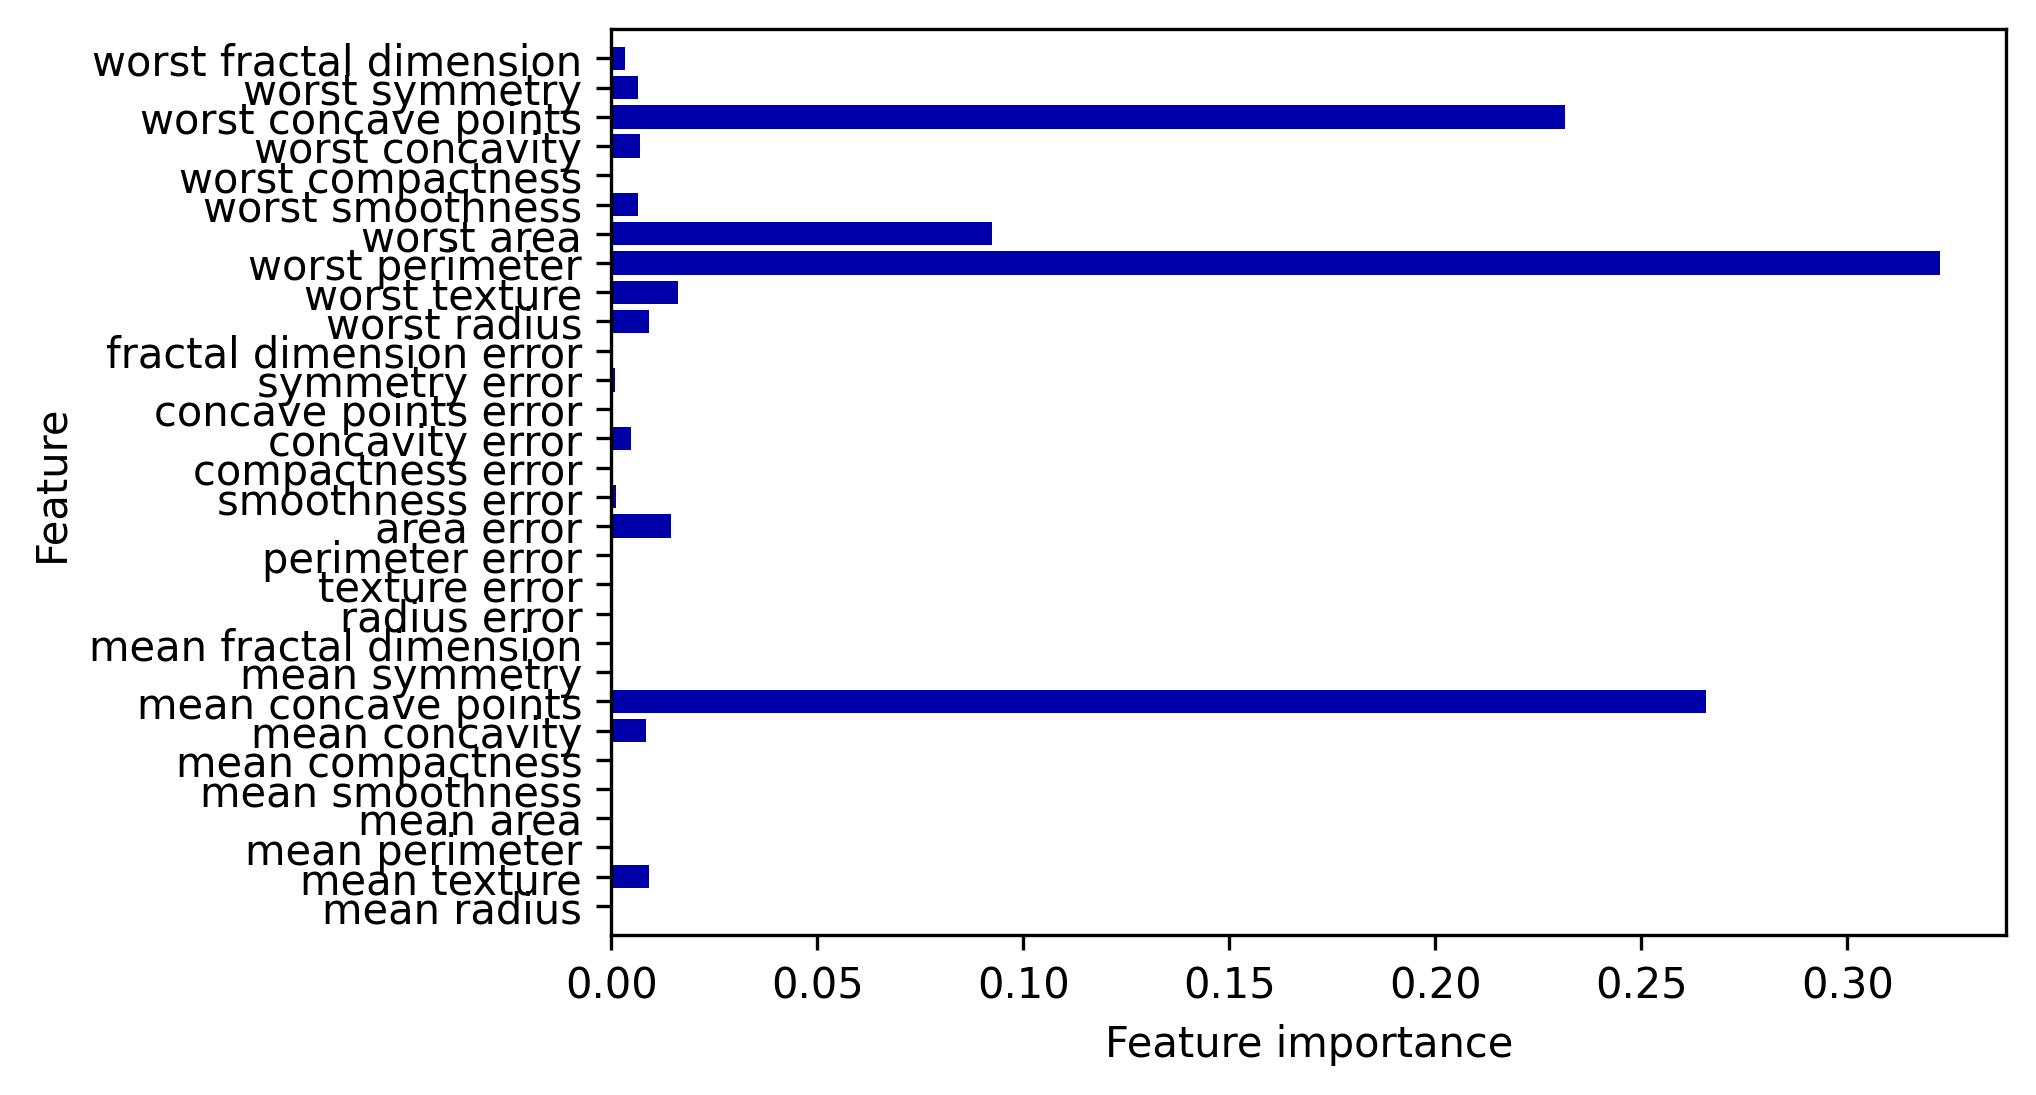

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1,learning_rate=.1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
plot_feature_importances_cancer(gbrt)

[link text](https://)Try random forest or gradient boosted trees on the mortgage data from last time!

In [ ]:
# Try grid search cross validation on the gradient boosted tree
